# [과제 3] 로지스틱 회귀분석
### - sklearn 패키지를 사용해 로지스틱 회귀분석을 진행해주세요.
### - 성능지표를 계산하고 이에 대해 해석해주세요.
### - 성능 개선을 시도해주세요. (어떠한 성능지표를 기준으로 개선을 시도했는지, 그 이유도 함께 적어주세요.)
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

## Data

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data = pd.read_csv("assignment3_creditcard.csv")

In [3]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

[[5688    0]
 [   7   41]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5688
           1       1.00      0.85      0.92        48

    accuracy                           1.00      5736
   macro avg       1.00      0.93      0.96      5736
weighted avg       1.00      1.00      1.00      5736

ROC-AUC Score: 0.9270833333333333


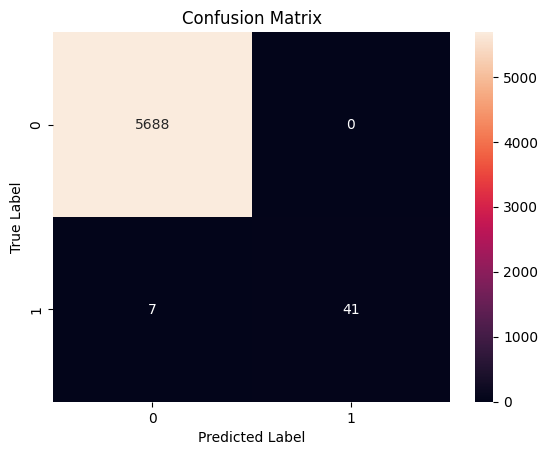

In [5]:
# 데이터셋을 특성(X)과 타겟(y)으로 분리.
X = data.drop('Class', axis=1)  # 'Class' 열을 제외한 모든 열을 특성으로 사용.
y = data['Class']  # 'Class' 열은 타겟 변수로 사용.

# 훈련 세트와 테스트 세트 분리.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델을 생성하고 훈련
model = LogisticRegression()
model.fit(X_train, y_train)

# 테스트 데이터로 예측 수행
y_pred = model.predict(X_test)

# confusion matrix 사용하여 모델 성능을 평가합니다.
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# classfication report
print(classification_report(y_test, y_pred))

# ROC-AUC 점수 계산
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC-AUC Score: {roc_auc}')

# confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler

# 특성 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 하이퍼파라미터 튜닝을 통한 모델 개선
# 규제 강도를 조절 (C값이 증가할수록 규제 감소)
model = LogisticRegression(C=1.0)
model.fit(X_train_scaled, y_train)

# 성능 평가
y_pred = model.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[5688    0]
 [   7   41]]


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

# 데이터를 표준화합니다. (특성 스케일링)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 로지스틱 회귀 모델의 하이퍼파라미터 설정.
param_grid = {
    'logisticregression__C': np.logspace(-4, 4, 20),
    'logisticregression__penalty': ['l1', 'l2']
}

# 파이프라인을 생성 -> 이것은 스케일러와 로지스틱 회귀 모델을 연결
pipeline = make_pipeline(StandardScaler(), LogisticRegression(solver='liblinear'))

# GridSearchCV를 사용하여 최적의 하이퍼파라미터 찾기
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 최고의 ROC-AUC 점수 출력.
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validated ROC-AUC score: {grid_search.best_score_}")

# ROC-AUC 점수.
best_model = grid_search.best_estimator_
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # 예측 확률을 얻습니다.
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'Test ROC-AUC Score: {roc_auc}')

Best parameters: {'logisticregression__C': 0.08858667904100823, 'logisticregression__penalty': 'l1'}
Best cross-validated ROC-AUC score: 0.976272531197738
Test ROC-AUC Score: 0.9910667194092827
